In [ ]:
%pip install copulas
%pip install sdv
#importing needed libraries


In [ ]:
import pandas as pd
data = pd.read_csv('/content/Data.csv')
#import the data set that you have to test on

In [ ]:
data

,Sex,Age_category,Highest_education_level
0,2,2,2
1,1,2,3
2,2,1,2
3,2,2,3
4,1,2,2
...,...,...,...
195,2,1,1
196,1,2,2
197,2,1,3
198,1,1,0


In [ ]:
categorical_features=["Sex","Age_category","Highest_education_level"]
desired_frequencies = {
    'Sex':{1: 25324, 2: 24676},
    'Age_category':{1: 17955, 2: 29642, 3: 2403},
    'Highest_education_level':{0: 7490, 1: 5655, 2: 24400, 3: 12455}
}

Yeah idhar upar tumne number kaise determine kiya , uska code bhi laga dena

In [ ]:
import numpy as np

from copulas.multivariate import GaussianMultivariate
model = GaussianMultivariate()
model.fit(data)
#run the model and fit your data into the model

synthetic=model.sample(50000) #generate 50000 columns from the original data

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


In [ ]:
synthetic

,Sex,Age_category,Highest_education_level
0,0.980779,1.180739,1.291744
1,1.913601,0.900507,2.765332
2,0.892560,1.856060,1.330959
3,1.794401,1.135465,2.246358
4,0.684554,1.082383,1.942221
...,...,...,...
49995,2.022312,1.801854,2.882693
49996,1.295889,1.890692,3.257900
49997,1.017047,2.397121,1.660867
49998,1.113091,1.250634,2.022405


Idhar upar yeah values decimal mai kaise aa rahi hai? matlab woh just integer form mai honi chahiye

In [ ]:
synthetic.isnull().values.any() #check if there are any empty values in the synthetic data

False

                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.013640                -0.060735
Age_category            -0.013640      1.000000                 0.196792
Highest_education_level -0.060735      0.196792                 1.000000


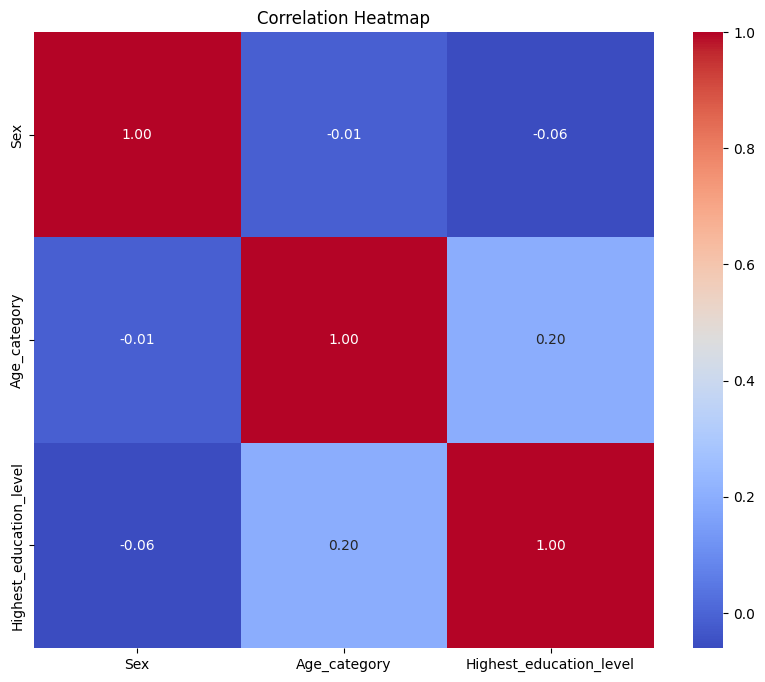

                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.015917                -0.069140
Age_category            -0.015917      1.000000                 0.239223
Highest_education_level -0.069140      0.239223                 1.000000


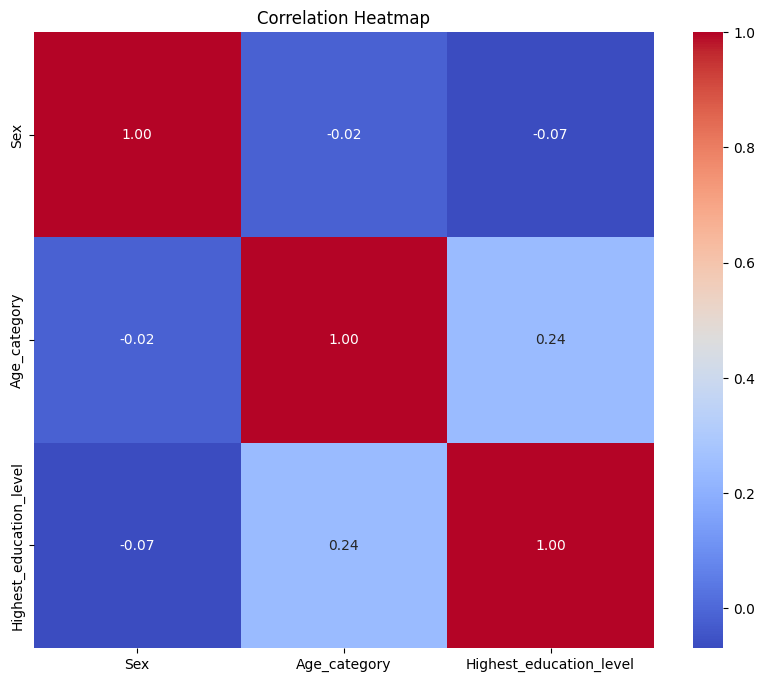

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = synthetic.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
correlation_matrix = data.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ISME CORRELATION MATRIX of real data and synthetic data wale mai values ka kitna difference hai percntage wise , usko bhi calculate karna, aur fir unka mean difference nikal lena percentage wise

In [ ]:
#plot functions
def plot_data(df):
    # Get column names
    columns = df.columns

    # Determine the number of rows and columns for subplots
    num_cols = 3
    num_rows = len(columns) // num_cols
    if len(columns) % num_cols != 0:
        num_rows += 1

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    # Flatten axes if necessary
    if num_rows == 1:
        axes = axes.reshape(1, -1)

    # Plot pie charts for each column
    for i, col in enumerate(columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx][col_idx]

        # Calculate value counts for the column
        counts = df[col].value_counts(normalize=True)

        # Plot pie chart
        ax.pie(counts, labels=counts.keys(), autopct='%1.1f%%', startangle=140)
        ax.set_title(col)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is your DataFrame
# plot_data(df)
def plot_mean_std(real: pd.DataFrame, fake: pd.DataFrame, ax=None, fname=None):
    """
    Plot the means and standard deviations of each dataset.

    :param real: DataFrame containing the real data
    :param fake: DataFrame containing the fake data
    :param ax: Axis to plot on. If none, a new figure is made.
    :param fname: If not none, saves the plot with this file name.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle('Absolute Log Mean and STDs of numeric data\n', fontsize=16)

    ax[0].grid(True)
    ax[1].grid(True)
    real = real.select_dtypes(include='number')
    fake = fake.select_dtypes(include='number')
    real_mean = np.log(np.add(abs(real.mean()).values, 1e-5))
    fake_mean = np.log(np.add(abs(fake.mean()).values, 1e-5))
    min_mean = min(real_mean) - 1
    max_mean = max(real_mean) + 1
    line = np.arange(min_mean, max_mean)
    sns.lineplot(x=line, y=line, ax=ax[0])
    sns.scatterplot(x=real_mean,
                    y=fake_mean,
                    ax=ax[0])
    ax[0].set_title('Means of real and fake data')
    ax[0].set_xlabel('real data mean (log)')
    ax[0].set_ylabel('fake data mean (log)')

    real_std = np.log(np.add(real.std().values, 1e-5))
    fake_std = np.log(np.add(fake.std().values, 1e-5))
    min_std = min(real_std) - 1
    max_std = max(real_std) + 1
    line = np.arange(min_std, max_std)
    sns.lineplot(x=line, y=line, ax=ax[1])
    sns.scatterplot(x=real_std,
                    y=fake_std,
                    ax=ax[1])
    ax[1].set_title('Stds of real and fake data')
    ax[1].set_xlabel('real data std (log)')
    ax[1].set_ylabel('fake data std (log)')

    if fname is not None:
        plt.savefig(fname)

    if ax is None:
        plt.show()


Yeah function kya kar raha hai , aur iske plots kaha hai ?

In [ ]:
#synthesized data
import numpy as np
import pandas as pd

# Assuming you have your original dataset in a DataFrame called original_data
# original_data should have 200 samples

original_data=data
correlation_matrix = original_data.corr()

# 2. Resample data to generate new datasets
num_samples_to_generate = 50000
num_original_samples = 200

synthesized_data = []

for _ in range(num_samples_to_generate):
    # Resample with replacement
    resampled_indices = np.random.choice(num_original_samples-1, 5, replace=True)

    resampled_data = original_data.iloc[resampled_indices]

    # Ensure the correlation structure remains the same
    resampled_correlation_matrix = resampled_data.corr()
    # Adjust resampled data to match original correlation
    # You can use methods like Cholesky decomposition or other techniques to adjust covariance
    # Here, we'll use a simplified approach of scaling by the original correlation
    scaled_resampled_data = resampled_data.copy()
    for column in original_data.columns:
        scaled_resampled_data[column] = resampled_data[column] * np.sqrt(correlation_matrix.loc[column, column] / resampled_correlation_matrix.loc[column, column])

    synthesized_data.append(scaled_resampled_data)

# Concatenate synthesized datasets
synthesized_data = pd.concat(synthesized_data, ignore_index=True)

# 4. Verify correlation
synthesized_correlation_matrix = synthesized_data.corr()
print("Original Correlation Matrix:")
print(correlation_matrix)
print("\nSynthesized Correlation Matrix:")
print(synthesized_correlation_matrix)


Original Correlation Matrix:
                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.015917                -0.069140
Age_category            -0.015917      1.000000                 0.239223
Highest_education_level -0.069140      0.239223                 1.000000

Synthesized Correlation Matrix:
                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.022684                -0.078814
Age_category            -0.022684      1.000000                 0.240098
Highest_education_level -0.078814      0.240098                 1.000000


ISME BHI SAME WOH DIFFERENCE PERCENTAGE OF EACH COLUMN, AND THEN MEAN PERCENTAGE DIFFERENCE

                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.022684                -0.078814
Age_category            -0.022684      1.000000                 0.240098
Highest_education_level -0.078814      0.240098                 1.000000


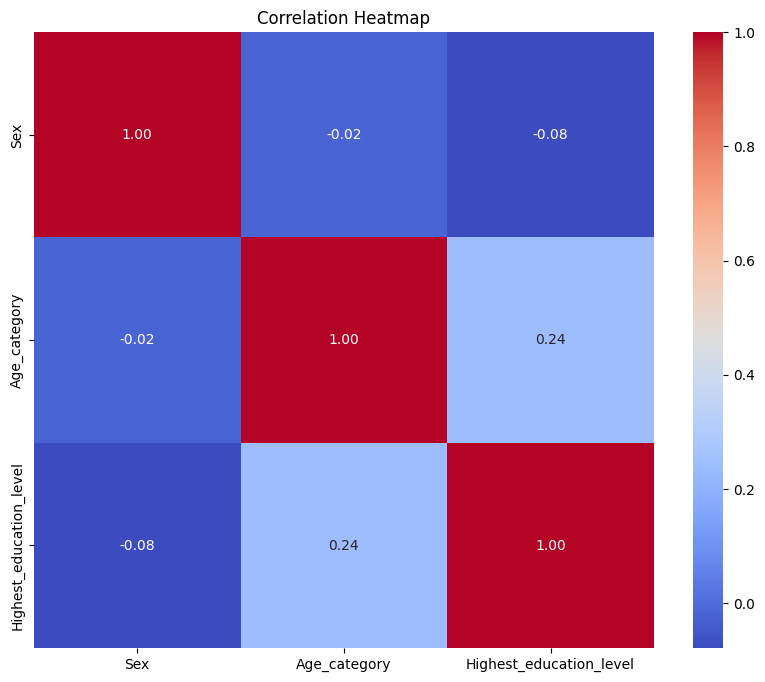

                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.013640                -0.060735
Age_category            -0.013640      1.000000                 0.196792
Highest_education_level -0.060735      0.196792                 1.000000


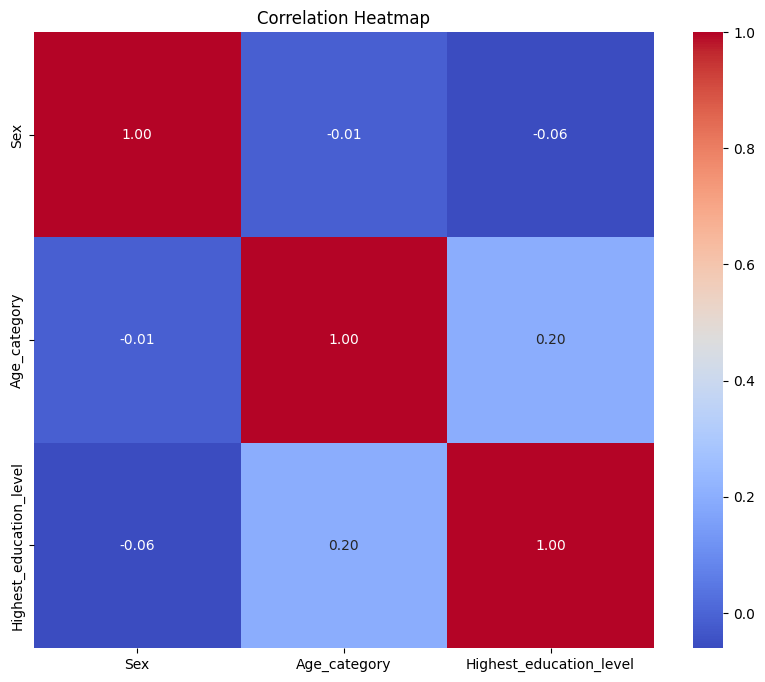

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = synthesized_data.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
correlation_matrix = synthetic.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

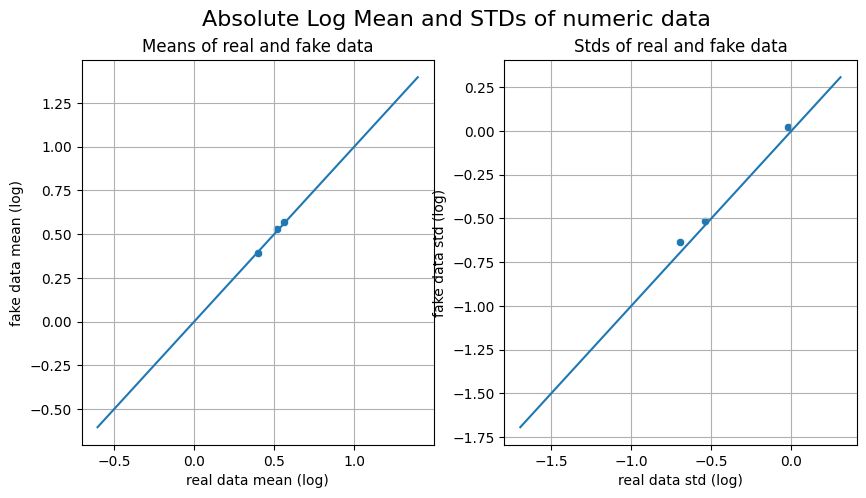

In [ ]:
plot_mean_std(synthesized_data,synthetic)